## 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
data = pd.read_csv('/Users/rohanpatil/Desktop/ai_ml_projects/project_1/data/Ames_Housing_Data.csv')

In [64]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [65]:
data.shape

## Rows - 2930
## Columns - 81

(2930, 81)

In [66]:
2930 - 159

2771

In [67]:
data.isna().sum().sort_values(ascending=False).head(5)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
dtype: int64

# > 50% - drop the column

In [68]:
drop_columns = ['Pool QC','Misc Feature', 'Alley', 'Fence','Mas Vnr Type','Fireplace Qu']


cleaned_data = data.drop(columns=drop_columns)

In [69]:
cleaned_data.isna().sum().sort_values(ascending=False).head(5)

Lot Frontage     490
Garage Cond      159
Garage Yr Blt    159
Garage Finish    159
Garage Qual      159
dtype: int64

### 3. Feature Engineering 

### Dealing with missing values : 1) mean 2) median 3) Interpolate

In [ ]:
cleaned_data['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64

In [33]:
mean_lot_front = cleaned_data['Lot Frontage'].mean()
mean_lot_front

69.22459016393442

In [34]:
median_lot_front = cleaned_data['Lot Frontage'].median()

In [53]:
cleaned_data['Lot Frontage'].fillna(mean_lot_front, inplace=True)

In [54]:
cleaned_data['Lot Frontage'].isna().sum()

0

### 3.1 Outliers Removal

<Axes: ylabel='Frequency'>

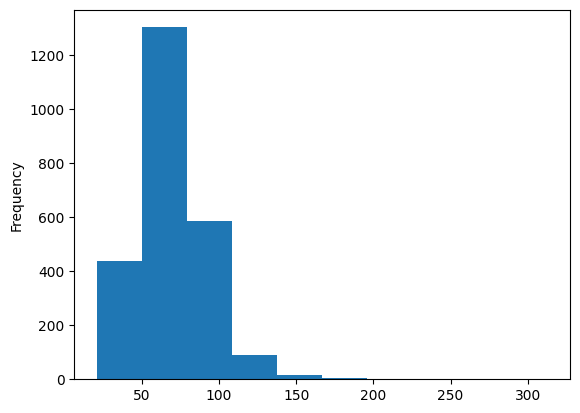

In [42]:
cleaned_data['Lot Frontage'].plot(kind='hist')

<Axes: ylabel='Lot Frontage'>

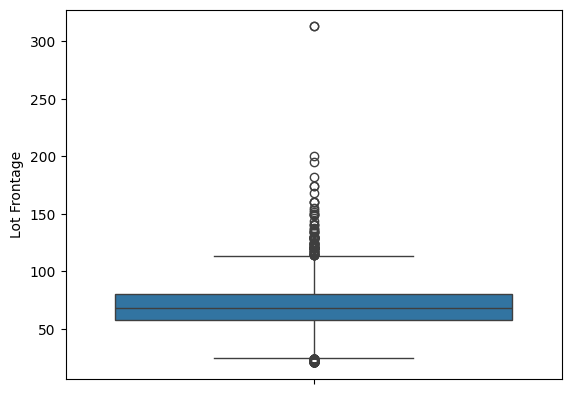

In [43]:
sns.boxplot(cleaned_data['Lot Frontage'])

## 1K , 1.5K , 2K + 5000K


## IQR = q3(75%) - q1(25%)

## lower fence = q1 - 1.5 * IQR  -> 22

## 58 - 1.5 * (22)


## upper fence = q3 + 1.5 * IQR -> 110

In [ ]:
# values < 25 and values > 110 : outliers

In [ ]:
cleaned_data[( cleaned_data['Lot Frontage'] < 110 ) & ( cleaned_data['Lot Frontage'] > 25 )]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,923250060,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [46]:
data['Lot Frontage'].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [45]:
(1 + 1.5 + 2 + 5000)/4

1251.125

In [73]:
cleaned_data['Garage Cond'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [75]:
cleaned_data['Garage Cond'].value_counts()

Garage Cond
TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64

In [77]:
gara_cond_mode = cleaned_data['Garage Cond'].mode()[0]

In [79]:
cleaned_data['Garage Cond'].fillna(gara_cond_mode, inplace=True)

In [84]:
cleaned_data['Garage Yr Blt'] = cleaned_data['Garage Yr Blt'].astype('object')

In [87]:
mode_garage_yr_blt = cleaned_data['Garage Yr Blt'].mode()[0]

In [88]:
cleaned_data['Garage Yr Blt'].fillna(mode_garage_yr_blt, inplace=True)

In [92]:
mode_garage_finish = cleaned_data['Garage Finish'].mode()[0]

In [93]:
cleaned_data['Garage Finish'].fillna(mode_garage_finish, inplace=True)

In [96]:
cleaned_data['Garage Qual'].fillna('TA', inplace=True)

In [99]:
cleaned_data['Lot Frontage'].fillna(cleaned_data['Lot Frontage'].mean(), inplace=True)

In [100]:
cleaned_data.isna().sum()

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 75, dtype: int64

In [ ]:
# Qualitative /Categorical Data : Nominal and Ordinal

# Year Built  : 1990,1991

In [111]:
cleaned_data_transformed = pd.get_dummies(cleaned_data, drop_first=True)

## 4. Model Building

In [108]:
cleaned_data.drop('PID', axis=1, inplace=True)

In [109]:
cleaned_data

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [112]:
cleaned_data_transformed

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.00000,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.00000,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.00000,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.00000,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,20,69.22459,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,True,False,False,False,True,False
2927,85,62.00000,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,20,77.00000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,True,False,False,False,True,False


In [117]:
target_col = 'SalePrice'

In [127]:
Features = cleaned_data_transformed.drop('SalePrice', axis=1)
target = cleaned_data_transformed['SalePrice'].values

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.3, random_state=42)

## 1. Linear Regression

In [129]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_test

In [131]:
y_pred = model.predict(X_test)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [132]:
mean_absolute_error(y_test, y_pred)

16675.46334989288

In [133]:
mean_squared_error(y_pred, y_test)

1182580206.5076554

In [134]:
r2_score(y_test, y_pred)

0.8233119093082285

## 2. decision Tree

## 3. Random Forest

## 4. Gradient Boosting